Experimental Design for Ordinary Least Squares based Linear Regression

PART A: Coffee Tasting Using Fractional Factorial Designs

In [1]:
!pip install dexpy

In [2]:
import dexpy.factorial
import pandas as pd
import numpy as np
np.random.seed(19) # set a random state

In [3]:
coffee_design = dexpy.factorial.build_factorial(5, 2**(5-2))
coffee_design.columns = ['amount', 'grind_size', 'brew_time', 'grind_type', 'beans']
coffee_design

,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,1,1
1,-1,-1,1,1,-1
2,-1,1,-1,-1,1
3,-1,1,1,-1,-1
4,1,-1,-1,-1,-1
5,1,-1,1,-1,1
6,1,1,-1,1,-1
7,1,1,1,1,1


In [4]:
coffee_design = dexpy.factorial.build_factorial(5, 2**(5-1))
coffee_design.columns = ['amount', 'grind_size', 'brew_time', 'grind_type', 'beans']
coffee_design

,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,-1,1
1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1
3,-1,-1,1,1,1
4,-1,1,-1,-1,-1
5,-1,1,-1,1,1
6,-1,1,1,-1,1
7,-1,1,1,1,-1
8,1,-1,-1,-1,-1
9,1,-1,-1,1,1


In [5]:
center_points = [[0, 0, 0, -1, -1],
                 [0, 0, 0, -1, 1],
                 [0, 0, 0, 1, -1],
                 [0, 0, 0, 1, 1]]

In [6]:
coffee_design = coffee_design.append(pd.DataFrame(center_points * 2, columns=coffee_design.columns))
coffee_design.index = np.arange(0, len(coffee_design))
coffee_design

,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,-1,1
1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1
3,-1,-1,1,1,1
4,-1,1,-1,-1,-1
5,-1,1,-1,1,1
6,-1,1,1,-1,1
7,-1,1,1,1,-1
8,1,-1,-1,-1,-1
9,1,-1,-1,1,1


In [7]:
actual_lows = { 'amount' : 2.5, 'grind_size' : 8, 'brew_time': 3.5,
'grind_type': 'burr', 'beans': 'light'}
actual_highs = { 'amount' : 4, 'grind_size' : 10, 'brew_time': 4.5,
'grind_type': 'blade', 'beans': 'dark'}
actual_design = dexpy.design.coded_to_actual(coffee_design, actual_lows, actual_highs)
actual_design

,amount,grind_size,brew_time,grind_type,beans
0,2.50,8.0,3.5,burr,dark
1,2.50,8.0,3.5,blade,light
2,2.50,8.0,4.5,burr,light
3,2.50,8.0,4.5,blade,dark
4,2.50,10.0,3.5,burr,light
5,2.50,10.0,3.5,blade,dark
6,2.50,10.0,4.5,burr,dark
7,2.50,10.0,4.5,blade,light
8,4.00,8.0,3.5,burr,light
9,4.00,8.0,3.5,blade,dark


Task A2 - Collect response values y(n) and add them to your dataset

In [8]:
coffee_design['taste_rating'] = [4.4, 2.6, 2.4, 8.6, 1.6, 2.8, 7.2, 3.4,
                                 6.8, 3.4, 3.8, 9.0, 5.2, 3.6, 8.2, 7.0,
                                 5.4, 6.8, 3.6, 5.4, 4.8, 6.2, 4.4, 5.8]
coffee_design

,amount,grind_size,brew_time,grind_type,beans,taste_rating
0,-1,-1,-1,-1,1,4.4
1,-1,-1,-1,1,-1,2.6
2,-1,-1,1,-1,-1,2.4
3,-1,-1,1,1,1,8.6
4,-1,1,-1,-1,-1,1.6
5,-1,1,-1,1,1,2.8
6,-1,1,1,-1,1,7.2
7,-1,1,1,1,-1,3.4
8,1,-1,-1,-1,-1,6.8
9,1,-1,-1,1,1,3.4


Task A3 - Fit coefficients in a plain linear regression model using OLS

In [9]:
coffee_design_as_np_array=coffee_design.to_numpy() #Convert from pandas to numpy array
y_np_array=coffee_design_as_np_array[:,5]
y_np_array=y_np_array.reshape(-1,1) #Reshape to column 2D numpy array
X_np_array=coffee_design_as_np_array[:,0:5] #Examples as rows
#LEAST SQUARES CLOSED FORM SOLUTION w=inv(Z'*Z)*Z'*y
#Extend X_np_array with one extra column for the intercept
shapeX=X_np_array.shape
nrows=shapeX[0]
Z = np.c_[np.ones((nrows, 1)), X_np_array] # add x_0 = 1 to each instance (row)
# to include an intercept term w_0 in the model
#Calculate w=inv(Z'*Z')*Z'*y using np.transpose() and np.matmul() and np.linalg.inv()
Ztranspose=np.transpose(Z)
ZtransposeZ=np.matmul(Ztranspose,Z)
ZtransposeZ_inv=np.linalg.inv(ZtransposeZ)
w_np_array=np.matmul(ZtransposeZ_inv,np.matmul(Ztranspose,y_np_array)) #column vector
print(w_np_array)

[[ 5.1       ]
 [ 0.875     ]
 [-0.125     ]
 [ 1.2       ]
 [-0.13333333]
 [ 0.45      ]]


Task A3 - Interpretation of the fitted coefficients

i) Based on the coefficients vector, x1 is the most significant feature since it has the highest the coefficient with the highest absolute value (w1 = 0,875). w0 = 5,1 is the intercept, it doesn't belong to any feature.

ii) If the input variables are in the same scale, their corresponding coefficients are directly comparable. On the other hand, if the real values for the input variables are used, the coefficient would not be directly comparable because they would be affected by the scale of each feature.

Task A4 - Refined analysis using interaction terms

In [10]:
shapeX = X_np_array.shape
nrows = shapeX[0]
Z_np_array = np.c_[np.ones((nrows, 1)), X_np_array]
Z_np_array = np.c_[Z_np_array, X_np_array[:,0]*X_np_array[:,1]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,0]*X_np_array[:,2]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,0]*X_np_array[:,3]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,0]*X_np_array[:,4]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,1]*X_np_array[:,2]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,1]*X_np_array[:,3]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,1]*X_np_array[:,4]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,2]*X_np_array[:,3]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,2]*X_np_array[:,4]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,3]*X_np_array[:,4]]
Ztranspose = np.transpose(Z_np_array)
ZtransposeZ = np.matmul(Ztranspose, Z_np_array)
ZtransposeZ_inv = np.linalg.inv(ZtransposeZ)
w_np_array = np.matmul(ZtransposeZ_inv, np.matmul(Ztranspose, y_np_array))

coef_names = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w12', 'w13', 'w14', 'w15', 'w23', 'w24', 'w25', 'w34', 'w35', 'w45']

for i in range(len(w_np_array)):
  print(f'{coef_names[i]}:\t{round(w_np_array[i, 0], 2)}')

w0:	5.1
w1:	0.87
w2:	-0.12
w3:	1.2
w4:	-0.13
w5:	0.45
w12:	0.25
w13:	-0.08
w14:	-0.17
w15:	-1.32
w23:	0.37
w24:	-0.72
w25:	0.38
w34:	0.75
w35:	0.15
w45:	0.08


The most influential input is x1*x5 with a coefficient of -1,325. It is curious that variables x1 and x5 have a positive coefficient, however, their interation has a negative coefficient.

If we have interactions, the influence of a variable is difficult to interpret because its influence on the response is affected by other variables.

PART B: D-Optimal Experimental Design

Task B1

In [11]:
import dexpy.optimal
from dexpy.model import ModelOrder

#D-optimal design of quadratic model
no_of_factors = 2
reaction_design = dexpy.optimal.build_optimal(no_of_factors, run_count=6, order=ModelOrder.quadratic)

#Print out of the design and conversion to real experimental values to use in the actual experiments to be performed
column_names = ['time', 'temp']
actual_lows = {'time': 40, 'temp': 80}
actual_highs = {'time': 50, 'temp': 90}
reaction_design.columns = column_names
print(dexpy.design.coded_to_actual(reaction_design, actual_lows, actual_highs))

        time       temp
0  40.000000  80.000000
1  40.000000  84.545455
2  40.000000  90.000000
3  50.000000  80.000000
4  50.000000  90.000000
5  44.673139  89.090909


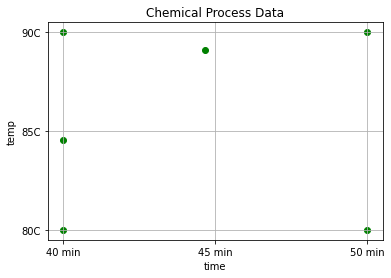

In [12]:
import matplotlib as plt
reaction_design_np_array=reaction_design.to_numpy()
fig = plt.pyplot.figure()
ax = fig.add_subplot()

# plotting the points
plt.pyplot.scatter(reaction_design_np_array[:,0], reaction_design_np_array[:,1],color='green', marker='o')
plt.pyplot.xlabel('time')
plt.pyplot.ylabel('temp')
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(['40 min', '45 min', '50 min'])
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(['80C', '85C', '90C'])
ax.grid()
plt.pyplot.title('Chemical Process Data')
plt.pyplot.show()

In [13]:
X_np_array=reaction_design_np_array
#Add columns corresponding to a full quadratic model to the design matrix Z_np_array
shapeX=X_np_array.shape
nrows=shapeX[0]
Z_np_array = np.c_[np.ones((nrows, 1)), X_np_array] # add x0 = 1 to each instance (row)
Z_np_array = np.c_[Z_np_array, X_np_array[:,0]*X_np_array[:,0]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,1]*X_np_array[:,1]]
Z_np_array= np.c_[Z_np_array, X_np_array[:,0]*X_np_array[:,1]]
det_Z_np_array = np.linalg.det(np.matmul(np.transpose(Z_np_array),Z_np_array))
print("|(Z'Z)| for optimal design:",det_Z_np_array)

|(Z'Z)| for optimal design: 249.6386531258116


In [14]:
#D-optimal design of quadratic model
no_of_factors = 3
reaction_design = dexpy.optimal.build_optimal(no_of_factors, run_count=10, order=ModelOrder.quadratic)

#Print out of the design and conversion to real experimental values to use in the actual experiments to be performed
column_names = ['time', 'temp', 'quantity']
actual_lows = { 'time': 40, 'temp': 80, 'quantity': 4.5}
actual_highs = { 'time': 50, 'temp': 90, 'quantity': 6}
reaction_design.columns = column_names
print(dexpy.design.coded_to_actual(reaction_design, actual_lows, actual_highs))

        time       temp  quantity
0  40.000000  80.000000  4.500000
1  42.727273  80.000000  6.000000
2  47.272727  80.000000  4.500000
3  50.000000  90.000000  4.500000
4  43.636364  85.454545  5.181818
5  40.000000  90.000000  6.000000
6  50.000000  80.000000  5.318182
7  50.000000  84.545455  6.000000
8  48.181818  90.000000  6.000000
9  40.000000  90.000000  4.500000


There is not any repeated experiments, we have 10 different combinations of input values.

Task B2 - OLS fitting of Paper Helicopter Data

In [15]:
X = [[-1, -1], [1, -1], [-1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 0], [-1,0], [0, 1], [0, -1]]
y = [13.65, 13.74, 15.48, 13.53, 17.38, 16.35, 16.41, 12.51, 15.17, 14.86, 11.85]
X_np_array = np.asarray(X)
y_np_array = np.asarray(y).reshape(-1, 1)
print('X = ')
print(X_np_array)
print('y = ')
print(y_np_array)

X = 
[[-1 -1]
 [ 1 -1]
 [-1  1]
 [ 1  1]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 1  0]
 [-1  0]
 [ 0  1]
 [ 0 -1]]
y = 
[[13.65]
 [13.74]
 [15.48]
 [13.53]
 [17.38]
 [16.35]
 [16.41]
 [12.51]
 [15.17]
 [14.86]
 [11.85]]


In [16]:
shapeX = X_np_array.shape
nrows = shapeX[0]
Z_np_array = np.c_[np.ones((nrows, 1)), X_np_array]
Z_np_array = np.c_[Z_np_array, X_np_array[:,0]*X_np_array[:,1]]
Z_np_array = np.c_[Z_np_array, X_np_array[:,0]**2]
Z_np_array = np.c_[Z_np_array, X_np_array[:,1]**2]
Ztranspose = np.transpose(Z_np_array)
ZtransposeZ = np.matmul(Ztranspose, Z_np_array)
ZtransposeZ_inv = np.linalg.inv(ZtransposeZ)
w_np_array = np.matmul(ZtransposeZ_inv, np.matmul(Ztranspose, y_np_array))

coef_names = ['w0', 'w1', 'w2', 'w12', 'w11', 'w22']

for i in range(len(w_np_array)):
  print(f'{coef_names[i]}:\t{round(w_np_array[i, 0], 2)}')

w0:	15.95
w1:	-0.75
w2:	0.77
w12:	-0.51
w11:	-0.97
w22:	-1.45


Task B3 - Fit Simulated Paper Helicopter Data Using a D-Optimal Design

In [17]:
#D-optimal design of quadratic model
no_of_factors = 2
helicopter_design = dexpy.optimal.build_optimal(no_of_factors, run_count=6, order=ModelOrder.quadratic)
helicopter_design.columns = ['x1', 'x2']
print(helicopter_design)

         x1        x2
0 -1.000000 -1.000000
1  0.454545 -1.000000
2 -1.000000  1.000000
3  1.000000  1.000000
4  1.000000 -0.272727
5 -0.090909  0.090909


In [18]:
x1 = helicopter_design.x1.to_numpy()
x2 = helicopter_design.x2.to_numpy()
Z_np_array = np.c_[np.ones((6, 1)), x1]
Z_np_array = np.c_[Z_np_array, x2]
Z_np_array = np.c_[Z_np_array, x1*x2]
Z_np_array = np.c_[Z_np_array, x1**2]
Z_np_array = np.c_[Z_np_array, x2**2]
y_exp = np.matmul(Z_np_array, w_np_array)
# add random noise
for i in range(len(y_exp)):
  y_exp[i] += np.random.normal(0, 0.1)
print('y_exp = ')
print(y_exp)

y_exp = 
[[13.02495591]
 [13.42194655]
 [15.49557378]
 [13.0248793 ]
 [13.96709698]
 [15.9261705 ]]


In [19]:
Ztranspose = np.transpose(Z_np_array)
ZtransposeZ = np.matmul(Ztranspose, Z_np_array)
ZtransposeZ_inv = np.linalg.inv(ZtransposeZ)
v_np_array = np.matmul(ZtransposeZ_inv, np.matmul(Ztranspose, y_exp))
print('w_coef = ')
print(w_np_array)
print('v_coef = ')
print(v_np_array)

w_coef = 
[[15.95157895]
 [-0.75333333]
 [ 0.77166667]
 [-0.51      ]
 [-0.96894737]
 [-1.45394737]]
v_coef = 
[[15.80693661]
 [-0.7369523 ]
 [ 0.73691399]
 [-0.49839494]
 [-0.93772877]
 [-1.3458953 ]]


There is some difference between the theoretical coefficients and the experimental coefficients, however, one can observe that the experimental coefficients come from the theoretical ones. 

PART C: EXTRA FOR HIGHER GRADES

Task C1 - Simulation study

In [20]:
# generate correlated data
a = -10 # low
b = 10 # high
d = 10 # number of input variables
b1 = np.random.uniform(a, b, d).reshape(1, -1) # 1xd vector
b2 = np.random.uniform(a, b, d).reshape(1, -1) # 1xd vector

N = 200 # number of experiments
mu = 0
sigma = 0.1
sigma_e = 1
sigma_x = 0.001
t1 = np.random.normal(mu, sigma, N).reshape(-1, 1) # Nx1 vector
t2 = np.random.normal(mu, sigma, N).reshape(-1, 1) # Nx1 vector
E = np.random.normal(mu, sigma_e, N*d).reshape(N, d) # Nxd matrix

X = np.matmul(t1, b1) + np.matmul(t2, b2) + sigma_x*E # Nxd matrix

In [21]:
# calculate correlation matrix
data = {'x1': X[:, 0], 'x2': X[:, 1], 'x3': X[:, 2], 'x4': X[:, 3], 'x5': X[:, 4],
        'x6': X[:, 5], 'x7': X[:, 6], 'x8': X[:, 7], 'x9': X[:, 8], 'x10': X[:, 9]}
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,-0.993117,0.945634,0.999815,-0.704265,0.179693,0.523317,0.974424,0.708093,0.400690
x2,-0.993117,1.000000,-0.901038,-0.990697,0.616276,-0.293662,-0.619512,-0.941402,-0.620525,-0.505233
x3,0.945634,-0.901038,1.000000,0.951679,-0.896869,-0.150011,0.217727,0.994533,0.899247,0.080928
x4,0.999815,-0.990697,0.951679,1.000000,-0.717709,0.160852,0.506929,0.978542,0.721463,0.383100
x5,-0.704265,0.616276,-0.896869,-0.717709,1.000000,0.571828,0.236409,-0.845785,-0.999984,0.368260
x6,0.179693,-0.293662,-0.150011,0.160852,0.571828,1.000000,0.932302,-0.045958,-0.567384,0.973300
x7,0.523317,-0.619512,0.217727,0.506929,0.236409,0.932302,1.000000,0.318446,-0.231153,0.990428
x8,0.974424,-0.941402,0.994533,0.978542,-0.845785,-0.045958,0.318446,1.000000,0.848657,0.184557
x9,0.708093,-0.620525,0.899247,0.721463,-0.999984,-0.567384,-0.231153,0.848657,1.000000,-0.363229
x10,0.400690,-0.505233,0.080928,0.383100,0.368260,0.973300,0.990428,0.184557,-0.363229,1.000000


Some of the input variables are strongly correlated.

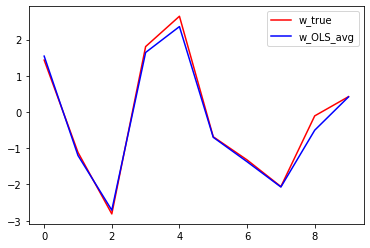

In [22]:
import matplotlib.pyplot as plt

w_true = np.random.uniform(-3, 3, d)
y_without_noise = np.matmul(X, w_true)

Xtranspose = np.transpose(X)
XtransposeX = np.matmul(Xtranspose, X)
XtransposeX_inv = np.linalg.inv(XtransposeX)

# each column in w_OLS_matrix will be the coefficients of a particular experiment
B = 1000
for b in range(B):
  ey = np.random.normal(mu, sigma, N)
  y = y_without_noise + ey # add noise
  w_OLS = np.matmul(XtransposeX_inv, np.matmul(Xtranspose, y))
  if b == 0:
    w_OLS_matrix = w_OLS
  else:
    w_OLS_matrix = np.c_[w_OLS_matrix, w_OLS]

# average OLS coefficients
w_OLS_avg = np.zeros((d, 1))
for i in range(d):
  w_OLS_avg[i] = np.average(w_OLS_matrix[i, :])

plt.plot(w_true, 'r-')
plt.plot(w_OLS_avg, 'b-')
plt.legend(labels=['w_true', 'w_OLS_avg'])
plt.show()

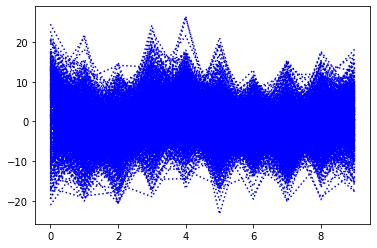

In [23]:
plt.plot(w_true, 'r-')
for b in range(B):
  plt.plot(w_OLS_matrix[:, b], 'b:')
plt.show()

Task C2 - Questions to answer

- The average OLS coefficients agree with the real coefficients.
- Most individual OLS coefficients don't agree with the real coefficients.
- OLS based linear regression is not useful when input variables are correlated.